<center><h1><font color="black">An Analysis on Hate Crime Data</font></h1></center>

Happy holidays everyone! In this kernal we will do an exploratory analysis on a hate crime data set taken from an FBI data base at "https://crime-data-explorer.fr.cloud.gov/downloads-and-docs".

All feedback is absolutely welcome, thanks in advance!

<center><b>Giving Credit Where Credit is Due</b></center>

A huge thanks goes out to the FBI and members of law enforecment for reporting crime data and putting it all together every year!

<center><b>Importing Libraries and Reading Data</b></center>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('../input/hate-crime/hate_crime.csv')

df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


<center><b>Data Preprocessing<b></center>

In [2]:
df.dtypes #Data types look good!

INCIDENT_ID                   int64
DATA_YEAR                     int64
ORI                          object
PUB_AGENCY_NAME              object
PUB_AGENCY_UNIT              object
AGENCY_TYPE_NAME             object
STATE_ABBR                   object
STATE_NAME                   object
DIVISION_NAME                object
REGION_NAME                  object
POPULATION_GROUP_CODE        object
POPULATION_GROUP_DESC        object
INCIDENT_DATE                object
ADULT_VICTIM_COUNT          float64
JUVENILE_VICTIM_COUNT       float64
TOTAL_OFFENDER_COUNT          int64
ADULT_OFFENDER_COUNT        float64
JUVENILE_OFFENDER_COUNT     float64
OFFENDER_RACE                object
OFFENDER_ETHNICITY           object
VICTIM_COUNT                  int64
OFFENSE_NAME                 object
TOTAL_INDIVIDUAL_VICTIMS    float64
LOCATION_NAME                object
BIAS_DESC                    object
VICTIM_TYPES                 object
MULTIPLE_OFFENSE             object
MULTIPLE_BIAS               

In [3]:
df.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,201403.000000,201403.000000,35973.000000,35496.000000,201403.000000,33952.000000,33945.000000,201403.000000,199797.000000
mean,114148.940031,2004.200906,0.504656,0.064683,0.969112,0.422449,0.083046,1.245647,0.973568
std,97935.432601,7.804374,0.972267,0.396970,1.387487,0.770693,0.436144,1.153782,1.107456
min,2.000000,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,50352.500000,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,100703.000000,2004.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,151053.500000,2011.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,603113.000000,2018.000000,80.000000,40.000000,99.000000,30.000000,15.000000,200.000000,147.000000


In [4]:
print(df['INCIDENT_ID'].size, df['ADULT_VICTIM_COUNT'].size,df['ADULT_OFFENDER_COUNT'].size)

201403 201403 201403


In [5]:
df['ADULT_VICTIM_COUNT'].count()

35973

Time to check quick for problematic nulls in our variables!

The only one we need to fix here is OFFENDER_RACE because we will be using that in the analysis. We don't need to worry about the rest.

In [6]:
df.isnull().sum() 

INCIDENT_ID                      0
DATA_YEAR                        0
ORI                              0
PUB_AGENCY_NAME                  0
PUB_AGENCY_UNIT             195809
AGENCY_TYPE_NAME                 0
STATE_ABBR                       0
STATE_NAME                       0
DIVISION_NAME                    0
REGION_NAME                      0
POPULATION_GROUP_CODE            0
POPULATION_GROUP_DESC            0
INCIDENT_DATE                    0
ADULT_VICTIM_COUNT          165430
JUVENILE_VICTIM_COUNT       165907
TOTAL_OFFENDER_COUNT             0
ADULT_OFFENDER_COUNT        167451
JUVENILE_OFFENDER_COUNT     167458
OFFENDER_RACE                   19
OFFENDER_ETHNICITY          183253
VICTIM_COUNT                     0
OFFENSE_NAME                     0
TOTAL_INDIVIDUAL_VICTIMS      1606
LOCATION_NAME                    0
BIAS_DESC                        0
VICTIM_TYPES                     0
MULTIPLE_OFFENSE                 0
MULTIPLE_BIAS                    0
dtype: int64

In [7]:
df["OFFENDER_RACE"].fillna('Unknown', inplace=True) #Fill Nulls as unknown

All set!

In [8]:
df.isnull().sum() 

INCIDENT_ID                      0
DATA_YEAR                        0
ORI                              0
PUB_AGENCY_NAME                  0
PUB_AGENCY_UNIT             195809
AGENCY_TYPE_NAME                 0
STATE_ABBR                       0
STATE_NAME                       0
DIVISION_NAME                    0
REGION_NAME                      0
POPULATION_GROUP_CODE            0
POPULATION_GROUP_DESC            0
INCIDENT_DATE                    0
ADULT_VICTIM_COUNT          165430
JUVENILE_VICTIM_COUNT       165907
TOTAL_OFFENDER_COUNT             0
ADULT_OFFENDER_COUNT        167451
JUVENILE_OFFENDER_COUNT     167458
OFFENDER_RACE                    0
OFFENDER_ETHNICITY          183253
VICTIM_COUNT                     0
OFFENSE_NAME                     0
TOTAL_INDIVIDUAL_VICTIMS      1606
LOCATION_NAME                    0
BIAS_DESC                        0
VICTIM_TYPES                     0
MULTIPLE_OFFENSE                 0
MULTIPLE_BIAS                    0
dtype: int64

<center><b>Comparing Incident Counts with Different Variables<b></center>

For this, we are going to check the number of incidences of hate crimes based on The race of the offender, reigon where the crime occured, state where the crime occured, most common incident locations, type of victim, and type of offense. 

Lets get to it!

In [9]:
df['OFFENDER_RACE'].value_counts()

Unknown                                      89303
White                                        79514
Black or African American                    25956
Multiple                                      4047
Asian                                         1453
American Indian or Alaska Native              1095
Native Hawaiian or Other Pacific Islander       35
Name: OFFENDER_RACE, dtype: int64

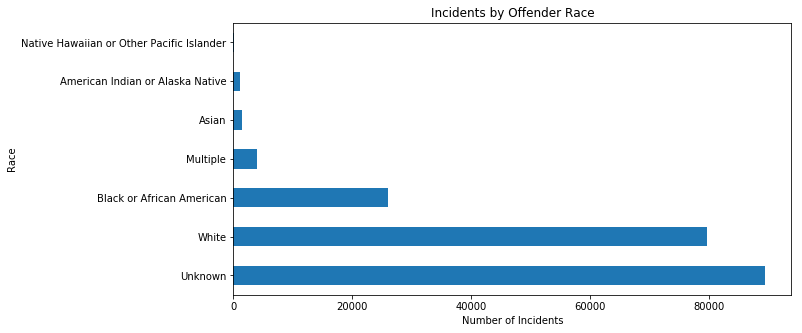

In [10]:
plt.figure(figsize=(10,5))

df['OFFENDER_RACE'].value_counts().plot(kind='barh')

plt.title('Incidents by Offender Race')
plt.ylabel('Race')
plt.xlabel('Number of Incidents')

plt.show()


In [11]:
df['REGION_NAME'].value_counts()

West                61590
Northeast           57896
South               41815
Midwest             40075
Other                  22
U.S. Territories        5
Name: REGION_NAME, dtype: int64

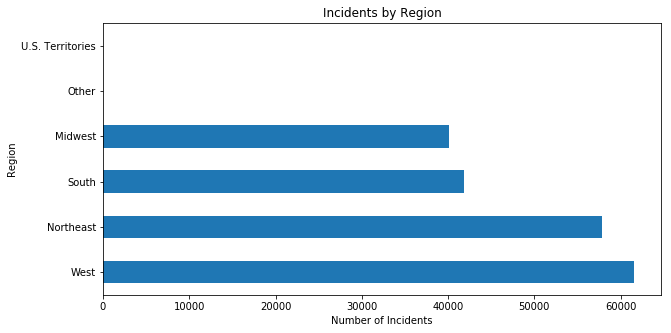

In [12]:
plt.figure(figsize=(10,5))

df['REGION_NAME'].value_counts().plot(kind='barh')

plt.title('Incidents by Region')
plt.ylabel('Region')
plt.xlabel('Number of Incidents')

plt.show()


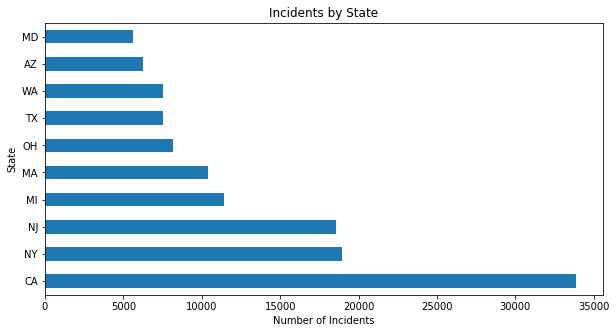

In [13]:
plt.figure(figsize=(10,5))

df['STATE_ABBR'].value_counts(ascending=False).nlargest(10).plot(kind='barh')

plt.title('Incidents by State')
plt.ylabel('State')
plt.xlabel('Number of Incidents')

plt.show()

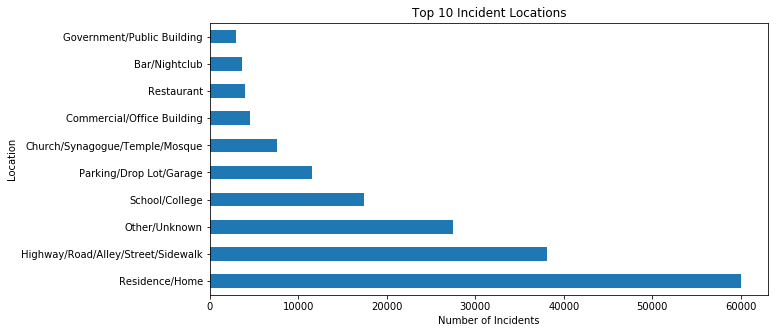

In [14]:
df['LOCATION_NAME'].value_counts().nlargest(10)


plt.figure(figsize=(10,5))

df['LOCATION_NAME'].value_counts(ascending=False).nlargest(10).plot(kind='barh')

plt.title('Top 10 Incident Locations')
plt.ylabel('Location')
plt.xlabel('Number of Incidents')

plt.show()

In [15]:
df['VICTIM_TYPES'].value_counts().nlargest(8)

Individual                159814
Other                      12756
Business                    8448
Religious Organization      5714
Government                  5307
Society/Public              4638
Individual;Other            1569
Unknown                     1240
Name: VICTIM_TYPES, dtype: int64

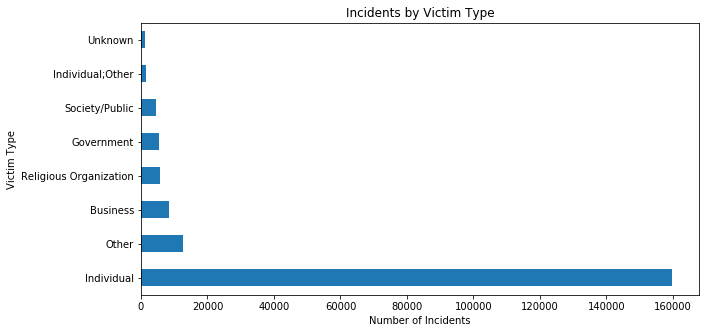

In [16]:
plt.figure(figsize=(10,5))

df['VICTIM_TYPES'].value_counts().nlargest(8).plot(kind='barh')

plt.title('Incidents by Victim Type')
plt.ylabel('Victim Type')
plt.xlabel('Number of Incidents')

plt.show()

In [17]:
df['OFFENSE_NAME'].value_counts().nlargest(15)

Destruction/Damage/Vandalism of Property                                 62147
Intimidation                                                             58751
Simple Assault                                                           38042
Aggravated Assault                                                       20999
Robbery                                                                   3454
Burglary/Breaking & Entering                                              2670
Destruction/Damage/Vandalism of Property;Intimidation                     1774
All Other Larceny                                                         1616
Arson                                                                     1091
Intimidation;Simple Assault                                                869
Drug/Narcotic Violations                                                   812
Not Specified                                                              664
Theft From Motor Vehicle                            

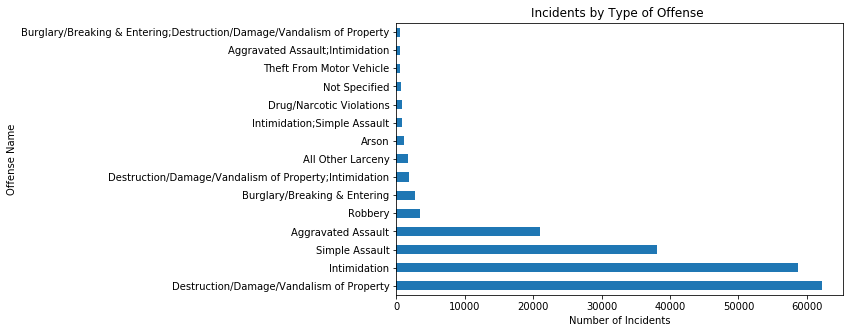

In [18]:
plt.figure(figsize=(8,5))

df['OFFENSE_NAME'].value_counts().nlargest(15).plot(kind='barh')

plt.title('Incidents by Type of Offense ')
plt.ylabel('Offense Name')
plt.xlabel('Number of Incidents')

plt.show()

In [19]:
df['STATE_ABBR'].value_counts().nlargest(10)

CA    33891
NY    18931
NJ    18559
MI    11398
MA    10402
OH     8156
TX     7520
WA     7517
AZ     6273
MD     5626
Name: STATE_ABBR, dtype: int64

<center><b>Number of Hate Crime Incidents by Year<b></center>

Next we are going to see how many crimes occurred from the year 1991 to 2018.

In [20]:
year = df.groupby(by='DATA_YEAR').count().reset_index() #Group data by year

In [21]:
year

,DATA_YEAR,INCIDENT_ID,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,1991,4589,4589,4589,127,4589,4589,4589,4589,4589,...,4589,0,4589,4589,4589,4589,4589,4589,4589,4589
1,1992,6667,6667,6667,199,6667,6667,6667,6667,6667,...,6667,0,6667,6667,6667,6667,6667,6667,6667,6667
2,1993,7608,7608,7608,273,7608,7608,7608,7608,7608,...,7608,0,7608,7608,7608,7608,7608,7608,7608,7608
3,1994,5954,5954,5954,231,5954,5954,5954,5954,5954,...,5954,0,5954,5954,5954,5954,5954,5954,5954,5954
4,1995,7950,7950,7950,285,7950,7950,7950,7950,7950,...,7950,0,7950,7950,7950,7950,7950,7950,7950,7950
5,1996,8790,8790,8790,217,8790,8790,8790,8790,8790,...,8790,0,8790,8790,8790,8790,8790,8790,8790,8790
6,1997,8107,8107,8107,211,8107,8107,8107,8107,8107,...,8107,0,8107,8107,8107,8107,8107,8107,8107,8107
7,1998,7902,7902,7902,173,7902,7902,7902,7902,7902,...,7902,0,7902,7902,7902,7902,7902,7902,7902,7902
8,1999,7943,7943,7943,268,7943,7943,7943,7943,7943,...,7943,0,7943,7943,7943,7943,7943,7943,7943,7943
9,2000,8219,8219,8219,232,8219,8219,8219,8219,8219,...,8219,0,8219,8219,8219,8219,8219,8219,8219,8219


In [22]:
year_data =year[['DATA_YEAR','INCIDENT_ID']] #Make a new data frame to 

In [23]:
year_data

,DATA_YEAR,INCIDENT_ID
0,1991,4589
1,1992,6667
2,1993,7608
3,1994,5954
4,1995,7950
5,1996,8790
6,1997,8107
7,1998,7902
8,1999,7943
9,2000,8219


Text(0, 0.5, 'Number of Incidents')

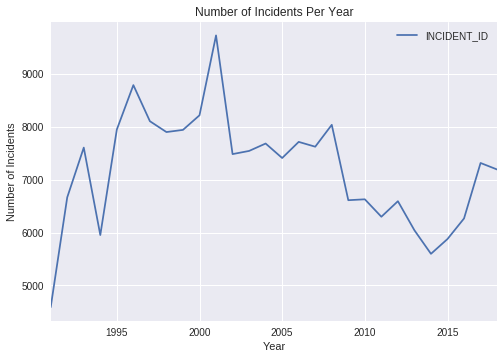

In [24]:
years=list(map(str,range(1991,2018))) #Create the graph

plt.style.use('seaborn')
year_data.plot.line(x='DATA_YEAR')

plt.title('Number of Incidents Per Year')

plt.xlabel('Year')
plt.ylabel('Number of Incidents')

<center><b>Count of Hate Crimes by Entity Being Discriminated Against<b></center>

I felt that this count in particular needed it's own section for the sake of simplicity and clarity and because of the sheer number of different entities discriminated against. I did not include all of them and so I decided to make the cut off point at the top 20.

In [25]:
df['BIAS_DESC'].value_counts().nlargest(20) #Get the 20 largest

Anti-Black or African American                               69056
Anti-Jewish                                                  26109
Anti-White                                                   23345
Anti-Gay (Male)                                              20316
Anti-Hispanic or Latino                                      12837
Anti-Other Race/Ethnicity/Ancestry                           10101
Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)     6077
Anti-Asian                                                    5913
Anti-Multiple Races, Group                                    4854
Anti-Lesbian (Female)                                         4266
Anti-Islamic (Muslim)                                         3606
Anti-Other Religion                                           3337
Anti-American Indian or Alaska Native                         2160
Anti-Catholic                                                 1473
Anti-Protestant                                               

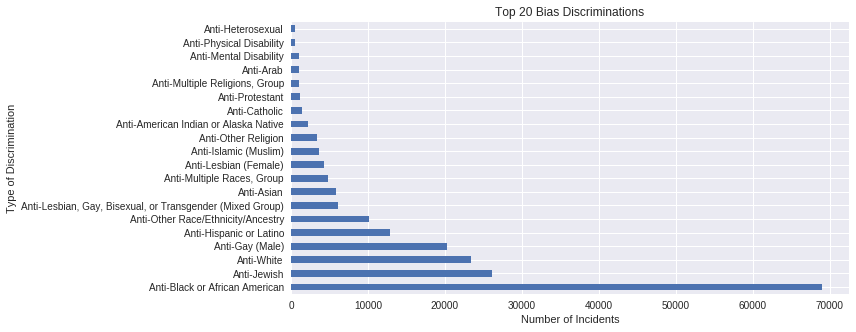

In [26]:
plt.figure(figsize=(10,5)) #Plot it

df['BIAS_DESC'].value_counts(ascending=False).nlargest(20).plot(kind='barh')

plt.title('Top 20 Bias Discriminations')
plt.ylabel('Type of Discrimination')
plt.xlabel('Number of Incidents')

plt.show()

<center><h1><font color="black">Conclusion</font></h1></center>

According to this data set alone there were some interesting conclusions. The most prevalent offender race was white. North east and west United States had the most hate crimes committed, specifically in California. Hate crimes were most prevalent against individuals and occured at a home residence. The type of crime to occur the most was descruction or vandalism of property. The most common bias discrmination was anti African American discrimination.

Thank you again for reading everyone!

Please, again, feel free to give me any feedback on this analysis. There is always room for improvement!